In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Steps in building a regression model
1. collect / Extract data
2. Pre-processing the data
3. Dividing data into training and validation datasets
4. PErform descriptivr alalytics or data exploration
5. Build the model
6. Perform mdel diagnostics
7. validate the model and measure model accuracy
8. decide on model deployment


**Simple linear regression model**<br>
statistical model in which there ins only one independent variable(feature) and functional relationship between the outcome variable and regression coefficient is linear. Linear regression implies thet the mathematical function is linear with respect ti regression parameters<br>
Y = b0 + b1 X + e  <br>
where :
1. Y = depandent variable
2. b0 = regression parameter(y-intercept in this case)
3. b1 = regression parameter(slope of the line)
4. e = rendom error(also known as residuals)

The regression parameters b0 and b1 are estimated by minimizing the sum of squared errors (SSE). 

The estimated values of regression parameters are given by taking partial derivative of SSE with respect to b0 and b1 and solving the resulting equations for the regression parameters

b1= sum((X.Y)/X^2)<br>
b0 = mean(y) - b1*mean(x)<br>
here: X = x-mean(x) and Y = y - mean(y)

#### Assumptions of the Linear Regression Model
1.  The errors or residuals ei are assumed to follow a normal distribution with expected value of error E(ei) = 0.
2.   The variance of error, VAR(ei), is constant for various values of independent variable X. This is known as homoscedasticity. When the variance is not constant, it is called heteroscedasticity.
3.   The error and independent variable are uncorrelated.
4.   The functional relationship between the outcome variable and feature is correctly defined.

In [56]:
#setting pandas print option to print decimal values upto 4 decimal places
np.set_printoptions(precision=4, linewidth=100)

In [57]:
mba_salary_df = pd.read_csv('data/MBA salary.csv')
mba_salary_df.head(10)

,S.No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [58]:
mba_salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No.                   48 non-null     int64  
 1   Percentage in Grade 10  48 non-null     float64
 2   Salary                  48 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [59]:
mba_salary_df.describe()

,S.No.,Percentage in Grade 10,Salary
count,48.000000,48.000000,48.000000
mean,25.000000,64.298333,260200.000000
std,14.439897,9.811509,75419.654304
min,1.000000,37.330000,120000.000000
25%,12.750000,57.895000,213500.000000
50%,25.000000,65.400000,250000.000000
75%,37.250000,70.500000,300000.000000
max,49.000000,83.000000,450000.000000


The statsmodel library is   used in   Python for    building statistical models. OLS API available in statsmodel.api is used for estimation of parameters for simple linear regression model. The OLS() model takes two param-eters Y and X. In this example, Percentage in Grade 10 will be X and Salary will be Y. OLS API available in statsmodel.api estimates only the coefficient of X parameter [refer to Eq. (4.1)]. To estimate regression coef-ficient b0, a constant term of 1needs to be added as a separate column. As the value of the columns remains same across all samples, the parameter estimated for this feature or column will be the intercept term.

In [60]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [61]:

Y = mba_salary_df['Salary']
print(Y.head(),end='\n\n')
train_X, test_X, train_Y,test_y = train_test_split(X,Y,train_size = 0.8, random_state = 100)
mba_salary_lm = sm.OLS(train_Y,train_X).fit()
print(mba_salary_lm.params)

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

const                     46864.004824
Percentage in Grade 10     3324.779786
dtype: float64


In [62]:
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Xdash = np.array(mba_salary_df['Percentage in Grade 10']).reshape(-1,1)
Ydash = np.array(mba_salary_df['Salary']).reshape(-1,1)
train_xdash, test_xdash,train_ydash,test_ydash = train_test_split(Xdash,Ydash,train_size = 0.8,random_state=100)
regr = LinearRegression()
regr.fit(Xdash,Ydash)
print(regr.score(train_xdash,train_ydash))

0.1794204526928469


In [63]:
## regression model summary
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.161     
Dependent Variable:       Salary                AIC:                     960.4083  
Date:                     2022-04-22 12:46      BIC:                     963.6834  
No. Observations:         38                    Log-Likelihood:          -478.20   
Df Model:                 1                     F-statistic:             8.114     
Df Residuals:             36                    Prob (F-statistic):      0.00722   
R-squared:                0.184                 Scale:                   5.2675e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  46864.0048 75019.1526 0.6247 0.5361 -105281.8884 199009.8981
Percentage in Grade 10  3324.7798  1167.1894 2.8485 0.0072     957.6099   5691.9497
-----------------------------------------------------------------------------------
Omnibus:                    1.153              Durbin-Watson:                 2.362
Prob(Omnibus):              0.562              Jarque-Bera (JB):              1.157
Skew:                       0.330              Prob(JB):                      0.561
Kurtosis:                   2.457              Condition No.:                 410  
===================================================================================

"""

### Residual amalysis
Residuals or errors are the difference between the actual value of the outcome variable and the predicted value .  Residual  (error)  analysis  is  important  to  check  whether  the  assumptions  of  regression  models have been satisfied. It is performed to check the following:
1.   The residuals are normally distributed.
2.   Variance of residual is constant (homoscedasticity).
3.   The functional form of regression is correctly specified.
4.   There are no outliers.

<Figure size 576x432 with 0 Axes>

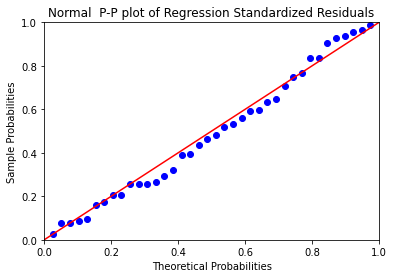

In [64]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot(mba_salary_resid,fit = True)
plt.figure(figsize =(8,6))
probplot.ppplot(line='45')
plt.title('Normal  P-P plot of Regression Standardized Residuals')
plt.show()

[]

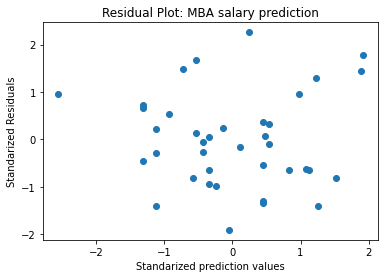

In [65]:
# test of homoscedasticity
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(mba_salary_lm.fittedvalues),get_standardized_values(mba_salary_resid))
plt.title('Residual Plot: MBA salary prediction')
plt.xlabel('Standarized prediction values')
plt.ylabel('Standarized Residuals')
plt.plot()

## z-score filter

In [66]:
# z-score filer 
from scipy.stats import zscore
mba_salary_df['z_score_salary'] = zscore(mba_salary_df.Salary)


In [67]:
mba_salary_df[(mba_salary_df>3.0) | (mba_salary_df<-3.0)]
# so there are no observations that are outliers as per z_score

,S.No.,Percentage in Grade 10,Salary,z_score_salary
0,NaN,62.00,270000,NaN
1,NaN,76.33,200000,NaN
2,NaN,72.00,240000,NaN
3,4.0,60.00,250000,NaN
4,5.0,61.00,180000,NaN
5,6.0,55.00,300000,NaN
6,7.0,70.00,260000,NaN
7,8.0,68.00,235000,NaN
8,9.0,82.80,425000,NaN
9,10.0,59.00,240000,NaN


## Cook's Distance
Cook’s distance measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from the sample for the estimation of regression parameters.

A   Cook’s distance value of   more than 1   indicates highly influential observation. Python code for   calculating  Cook’s  distance  is  provided  below.  In  this  **get_influence()** returns  the  influence  of  observations  in the model and **cook_distance** variable provides Cook’s distance measures. Then the distances can be plotted against the observation index to find out which observations are influential. 

/tmp/ipykernel_25831/2710318970.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(train_X)),np.round(c,3),markerfmt=",")


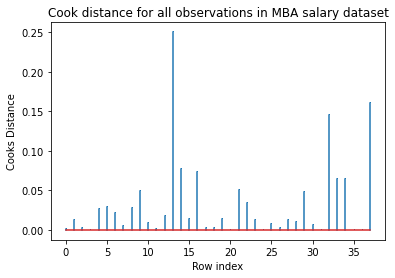

In [68]:
mba_influence = mba_salary_lm.get_influence()
(c,p) = mba_influence.cooks_distance
plt.stem(np.arange(len(train_X)),np.round(c,3),markerfmt=",")
plt.title('Cook distance for all observations in MBA salary dataset')
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


### Leverage Values
Leverage value of   an    observation measures the influence of   that observation on    the overall fit   of   the regression function and is   related to   the Mahalanobis distance. Leverage value of   more than 3(k + 1)/nis treated as highly influential observation, where k is the number of features in the model and n is the sample size.
**statsmodels.graphics.regressionplots** module  provides  **influence_plot()** which  draws  a  plot  between  standardized  residuals  and  leverage  value.  Mostly,  the  observations  with  high  leverage  value  (as  men-tioned above) and high residuals [more than value 3(k + 1)/n] can be removed from the training dataset.

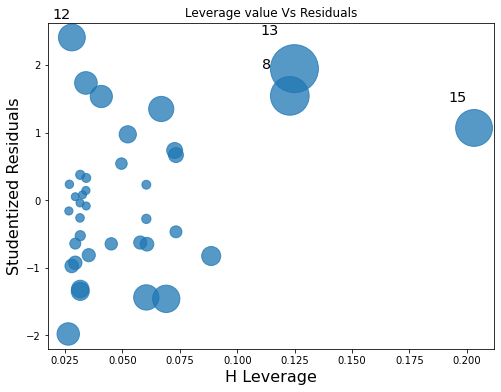

In [69]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(8,6))
influence_plot(mba_salary_lm,ax=ax)
plt.title("Leverage value Vs Residuals")
plt.show()

In [70]:
## The model variable has a method predict(), which takes the X parameters and returns the predicted values.
pred_y = mba_salary_lm.predict(test_X)

## Finding R-Squared and RMSE
Several  measures  can  be  used  for  measuring  the  accuracy  of  prediction. **Mean  Square  Error  (MSE)**, **Root Mean Square Error (RMSE)** and **Mean Absolute Percentage Error (MAPE)** are some of the fre-quently used measures. sklearn.metrics has r2_score and mean_squared_error for measuring R-squared and MSE values. We need to take the square root of the MSE value to get RMSE value. Both the methods take predicted Y values and actual Y values to calculate the accuracy measures. Numpy module has sqrt method to calculate the square root of a value.

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y,pred_y))
# model only explains 27.53% of variance in the validation set

0.2753142568524374

In [61]:
np.sqrt(mean_squared_error(test_y,pred_y))
#MSE means  the  average  error  the  model  makes  in  predicting  the  outcome. 
#The  smaller  the  value  of  RMSE, the better the model is.

65861.32118846104

### Calculating Prediction Intervals

The  regression  equation  gives  us  the  point  estimate  of  the  outcome  variable  for  a  given  value  of  the  independent variable. In many applications, we would be interested in knowing the interval estimate of Yifor  a  given  value  of  explanatory  variable.  wls_prediction_std() returns  the  prediction  interval  while  making a prediction. It takes significance value (a) to calculate the interval. An a-value of 0.1 returns the prediction at confidence interval of 90%. The code for calculating prediction interval is as follows: 

In [67]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predict the y values 
pred_y = mba_salary_lm.predict(test_X)

#predict the loe and high interval values for y
_,pred_y_low, pred_y_high = wls_prediction_std(mba_salary_lm,test_X,alpha = 0.1)

# store all the values in a dataframe
pred_y_df = pd.DataFrame({
    'grade_10_perc':test_X['Percentage in Grade 10'],
    'pred_y': pred_y,
    'pred_y_left':pred_y_low,
    'pred_y_right': pred_y_high
})
pred_y_df.head(10)

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279598.589823,154800.104814,404397.074832
28,67.0,269624.250466,145295.538069,393952.962863
32,78.0,306196.828109,178805.836533,433587.819684
26,74.0,292897.708966,167042.898229,418752.519703
41,74.4,294227.620880,168240.538890,420214.702871
47,66.0,266299.470680,142065.215502,390533.725858
5,55.0,229726.893038,104473.319438,354980.466637
40,64.8,262309.734938,138147.633977,386471.835898
18,70.0,279598.589823,154800.104814,404397.074832
31,55.0,229726.893038,104473.319438,354980.466637


## Multiple Regression
Predicting the SOLD PRICE (Auction Price) of Players

In [71]:
ipl_auction_df = pd.read_csv('data/IPL IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [72]:
#s the number of columns is very large, we will display the initial 10 columns for the first 5 rows. The function df.iloc() is used for displaying a subset of the dataset. 
ipl_auction_df.iloc[0:5,0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [73]:
X_features= ipl_auction_df.columns
X_features

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [74]:
X_features =  [ 'AGE', 'COUNTRY', 'PLAYING ROLE','T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B','ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S','HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [75]:
# encodinf categorial data features. they have to be encoded first in order to use neacuse they canot be used directly in the model
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [76]:
## conver catrgorial data to dummy variable
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [77]:
ipl_auction_df['PLAYING ROLE'].head()

0    Allrounder
1        Bowler
2        Bowler
3        Bowler
4       Batsman
Name: PLAYING ROLE, dtype: object

In [78]:
categorial_features =['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [79]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features],columns = categorial_features, drop_first=True)                                        

In [80]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [81]:
# x_features are updated by newly formed 
X_features = ipl_auction_encoded_df.columns


In [82]:
import statsmodels.api as sm

In [83]:
#spliting dataset into train and validation sets
X =sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']
train_X , test_X, train_y ,test_y = train_test_split(X,Y,train_size = 0.8 ,random_state = 42)

In [84]:
##  buliding model on the training dataset
ipl_model_1 = sm.OLS(train_y,train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2022-04-22 12:46        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

## Multi-Collinearity and Handling Multi-Collinearity
CollinearityWhen the dataset has a large number of independent variables (features), it is possible that few of these independent variables (features) may be highly correlated. The existence of a high correlation between independent variables is   called multi-collinearity. Presence of    multi-collinearity can destabilize the multiple linear regression model. Thus, it is necessary to identify the presence of multi-collinearity and take corrective actions.

Multi-collinearity can have the following impact on the model:
1.   The standard error of estimate, Se(b), is inflated. 
2.   A statistically significant explanatory variable may be labelled as statistically insignificant due to the large p-value. This is because when the standard error of estimate is inflated, it results in an underestimation of t-statistic value. 
3.    The sign of the regression coefficient may be different, that is, instead of negative value for regres-sion coefficient, we may have a positive regression coefficient and vice versa.
4.   Adding/removing a variable or even an observation may result in large variation in regression coefficient estimates.

#### Variance Inflation Factor(VIF)
Variance Inflance Facto(VIF) is a measure used for identifying the eistance of multi-collinearity. For example, consider tow independent variables X1 and X2 and regression between theb.<br>
X1 = (alpha not) + (alpha 1 ) * (X2)<br>
Let R12 be the R-squared value of this model. Then the VIF, which is a measure of multi-collinearity, is given by<br>
VIF = 1/(1-(R12)^2)<br>
sqrt(VIF) is the value by which the t-statistic value is deflected. VIF value of greater than 4 requires further investigation to assess the impact of multi-collinearity. One approach to eliminate multi-collinearity is to remove one of the variables from the model building. **variance_inflation_factor()** method  available  in  **statsmodels.stats.outliers_influence** package  can  be  used to calculate VIF for the features. The following method is written to calculate VIF and assign the VIF to the columns and return a DataFrame:

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factor(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [86]:
vif_factors = get_vif_factor(X[X_features])
vif_factors


,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#### Checking Correlation of Columns with Large VIFs
We can generate a correlation heatmap to understand the correlation between the independent variables which can be used to decide which features to include in the model. We will first select the features that have VIFvalueofmore than 4.


In [87]:
columns_with_large_vif = vif_factors[vif_factors.VIF>4].column
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

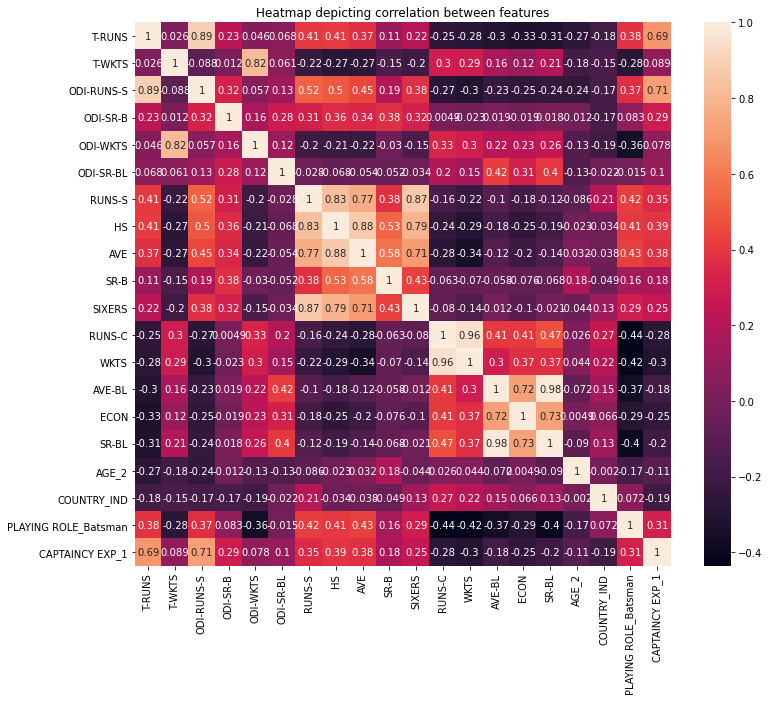

In [88]:
# then plot heatmap for features with VIF more than 4
plt.figure(figsize =(12,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot = True)
plt.title('Heatmap depicting correlation between features');

In [89]:
#To  avoid  multi-collinearity,  we  can  keep  only  one  column  from  each  group  of  highly 
# correlated  variables  and remove the others. Now which one to keep and which one to remove 
# depends on the understanding of the data and the domain.
columns_to_be_removed = [ 'T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2','SR-BL']

In [90]:
X_new_features= list(set(X_features)-set(columns_to_be_removed))
get_vif_factor(X[X_new_features])

## The  VIFs  on  the  final  set  of  variables  indicate  that  
## there  is  no  multi-collinearity  present  any  more  (VIF values are less than 4).
# We can proceed to build the model with these set of variables now.

,column,VIF
0,COUNTRY_IND,3.144668
1,PLAYING ROLE_Bowler,3.060168
2,COUNTRY_SL,1.519752
3,WKTS,2.883101
4,COUNTRY_WI,1.194093
5,COUNTRY_ENG,1.131869
6,PLAYING ROLE_W. Keeper,1.900941
7,COUNTRY_ZIM,1.205305
8,COUNTRY_BAN,1.094293
9,CAPTAINCY EXP_1,2.458745


### Building new model after removing multi-collinearity

In [91]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y,train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-04-22 12:46   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

Based on the p-values, only the variables ***COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY EXP_1*** have come out statistically significant. So, the features that decide the SOLD PRICE are
1.   Whether the players belong to India or England (that is, origin country of the player).
2.  How many sixes has the    player hit    in   previous versions of   the    IPL? How many wickets have been taken by the player in ODIs?
3.   Whether the player has any previous captaincy experience or not.

In [92]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_y,train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-04-22 12:46 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [93]:
## residual analysis 
def draw_pp_plot(model,title):
    probplot = sm.ProbPlot(model.resid, fit = True)
    plt.figure(figsize = (8,6))
    probplot.ppplot(line='45')
    plt.title(title)
    plt.show();

<Figure size 576x432 with 0 Axes>

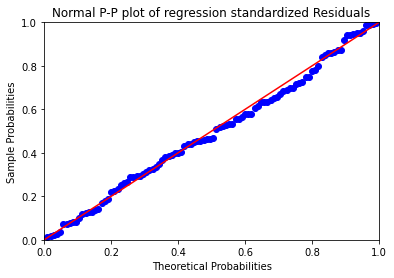

In [94]:
draw_pp_plot(ipl_model_3,'Normal P-P plot of regression standardized Residuals')

In [95]:
#Residual Plot for Homoscedasticity and Model Specification
def plot_resid_fittes(fitted,resid,title):
    plt.scatter(get_standardized_values(fitted),get_standardized_values(resid))
    plt.title(title)
    plt.xlabel('Standardized predicted values')
    plt.ylabel('standardized residual values')
    plt.show()

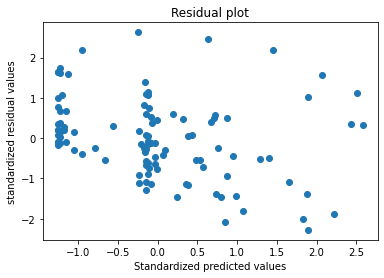

In [96]:
plot_resid_fittes(ipl_model_3.fittedvalues,ipl_model_3.resid,'Residual plot')

#### Detecting influencers
In    OLS estimate, we    assume that each record in   the data has equal influence on    the model parameters(regression coefficients), which may not be true. We can use the function influence_plot() as explained in the    previous example to   identify highly influential observations. Leverage values of   more than 3 (k + 1) / nare treated as highly influential observations. 

In [97]:
k = train_X.shape[1]
n= train_X.shape[0]
print(f'Number of variable : {k} , no. of observations:{n}')
leverage_cutoff = 3*((k+1)/n)
print(f'cutoff for leverage value:{round(leverage_cutoff,3)}')

Number of variable : 4 , no. of observations:104
cutoff for leverage value:0.144


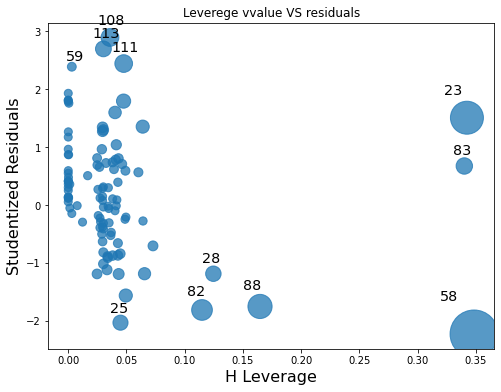

In [99]:
# so, observvations with leverage more than 0.178 are highly influential
from statsmodels.graphics.regressionplots import influence_plot
fig , ax = plt.subplots(figsize =(8,6))
influence_plot(ipl_model_3,ax= ax)
plt.title('Leverege vvalue VS residuals')
plt.show()

The above diagram shows there are three observations 23, 58, 83that have comparatively high leverage with residuals. We can filter out the influential observations.

In [100]:
ipl_auction_df[ipl_auction_df.index.isin([23,58,83])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


These observations do not have large residuals. So, it may not be necessary to remove these observations. But if the observations need to be removed, the following method drop() can be used:

In [103]:
train_X_new = train_X.drop([23,58,83],axis = 0)
train_y_new = train_y.drop([23,58,83],axis = 0)
#We will leave the next steps of building a model after removing the important observations, 
# to the reader to try themselves for practice. 

In [104]:
# We will create a new response variable by taking the square root of the existing values. This can be done by using Numpy’s sqrt() method.
train_y = np.sqrt(train_y)

In [106]:
ipl_model_4 = sm.OLS(train_y,train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2022-04-22 13:03 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

 the  R-squared value of   the model has increased to   0.751. The P-P plot in   Figure 4.9    also shows that the residuals follow a normal distribution

<Figure size 576x432 with 0 Axes>

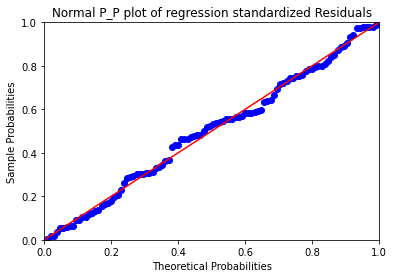

In [107]:
draw_pp_plot(ipl_model_4,'Normal P_P plot of regression standardized Residuals')

### Making predictive analysis 


In [108]:
pred_y = np.power(ipl_model_4.predict(test_X[train_X.columns]),2)

In [109]:
pred_y

55     2.621705e+03
40     2.665762e+05
19     8.921078e+04
31     6.554261e+02
115    1.820628e+03
56     5.898835e+03
69     0.000000e+00
105    2.407952e+05
81     6.097374e+05
26     2.306186e+06
95     2.492432e+05
27     4.655391e+05
64     2.665762e+05
4      5.323954e+05
97     1.417237e+06
100    7.282513e+01
36     8.811840e+03
80     3.619801e+05
93     2.504730e+06
84     2.362229e+05
18     1.220457e+06
10     1.051595e+05
120    1.890728e+05
11     1.745214e+05
126    1.745214e+05
45     4.660808e+03
dtype: float64

In [111]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

496151.1812255809

In [112]:
## measuring r_squared value 
np.round(metrics.r2_score(pred_y,test_y),2)

0.44